In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [7]:
train=pd.read_csv('TP_Doudou/train.csv')
test=pd.read_csv('TP_Doudou/test.csv')
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [131]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [132]:
X_train=train[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
label=train['Response']
test=test[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]


In [133]:
def change_age(age):
    if age=='> 2 Years':
        return 2
    elif age=='1-2 Year':
        return 1
    else:
        return 0

In [134]:
X_train['Vehicle_Age']=X_train['Vehicle_Age'].apply(lambda x: change_age(x))
test['Vehicle_Age']=test['Vehicle_Age'].apply(lambda x: change_age(x))

In [135]:
X_train['Vehicle_Damage']=X_train['Vehicle_Damage'].apply(lambda x: 1 if x=='Yes' else 0)
test['Vehicle_Damage']=test['Vehicle_Damage'].apply(lambda x: 1 if x=='Yes' else 0)

In [136]:
X_train['Gender']=X_train['Gender'].apply(lambda x: 1 if x=='Male' else 0)
test['Gender']=test['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [137]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,1,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,0,0,28619.0,152.0,203
4,0,29,1,41.0,1,0,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [138]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,1,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,0,26,1,37.0,1,0,0,30867.0,152.0,56
127033,0,38,1,28.0,0,1,1,28700.0,122.0,165
127034,1,21,1,46.0,1,0,0,29802.0,152.0,74
127035,1,71,1,28.0,1,1,0,62875.0,26.0,265


# Normalisation

In [139]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
test=std.transform(test)

In [140]:
X_train,X_test,Y_train,Y_test= train_test_split(X_train,label,test_size=0.3,stratify=label)

# 4.2. Sélection d'algorithme de classification :

# Regression Logistique

In [141]:
logistic=LogisticRegression()
score_logistic=cross_val_score(logistic,X_train,Y_train,cv=5)
score_logistic=np.mean(score_logistic)
score_logistic

np.float64(0.8772753175346079)

# SVM

In [142]:
svm=SVC(max_iter=1000)
score_svm=cross_val_score(svm,X_train,Y_train,cv=5)
score_svm=np.mean(score_svm)
score_svm

np.float64(0.8122695985356069)

# Arbre de decision

In [143]:
clf_tree=tree.DecisionTreeClassifier()
score_tree=cross_val_score(clf_tree,X_train,Y_train,cv=5)
score_tree=np.mean(score_tree)
score_tree

np.float64(0.8227651685621465)

## Forêts aléatoires

In [144]:
clf=RandomForestClassifier()
score_forest=cross_val_score(clf,X_train,Y_train,cv=5)
score_forest=np.mean(score_forest)
score_forest

np.float64(0.8671919472177656)

In [145]:
clf=GradientBoostingClassifier()
score_gradi=cross_val_score(clf_tree,X_train,Y_train,cv=5)
score_gradi=np.mean(score_gradi)
score_gradi

np.float64(0.8229975738663612)

Text(0.5, 0, 'modele')

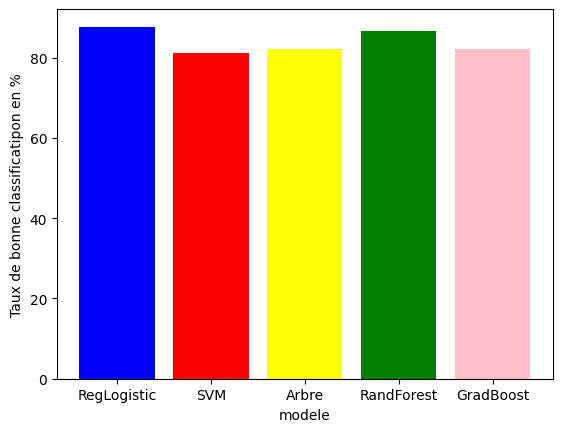

In [146]:
score=np.array([score_logistic,score_svm,score_tree,score_forest,score_gradi])*100
modele=['RegLogistic','SVM','Arbre','RandForest','GradBoost']
color=['blue','red','yellow','green','pink']
plt.bar(modele,score,color=color)
plt.ylabel('Taux de bonne classificatipon en %')
plt.xlabel('modele')


# La regression logistique donne le meilleur performance avec 87% de taux de bonne classification

# 4.3. Optimisation des hyperparamètres :

In [147]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100,1000],  # Régularisation
    'penalty': ['l1', 'l2','elastic'],  # Type de pénalité (Lasso ou Ridge)
    
}

# Grid Search avec validation croisée
grid_search = GridSearchCV(LogisticRegression(),param_grid, cv=5 ,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Afficher les meilleurs paramètres et la meilleure performance
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Meilleurs paramètres : {'C': 0.01, 'penalty': 'l2'}
Meilleure précision : 0.8773053048602784


# 5. Evaluation et interprétation du modèle
# 5.1. Evaluation du modèle sur le test interne :

In [148]:
clf=LogisticRegression(C=0.01,penalty='l2')
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.877340750264578

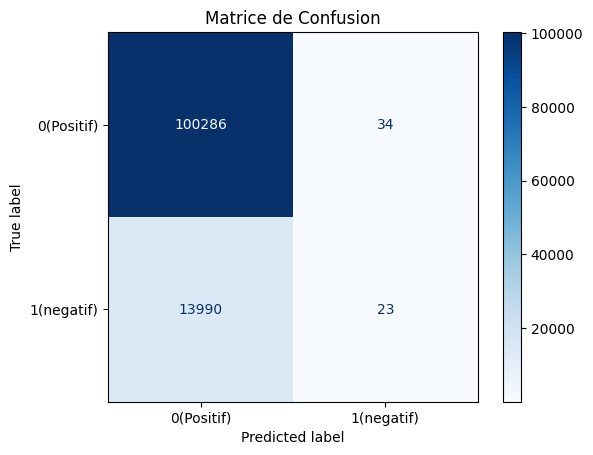

In [149]:
y_predi = clf.predict(X_test)

# Générer la matrice de confusion
cm = confusion_matrix(Y_test, y_predi)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0(Positif)','1(negatif)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion")
plt.show()

# Le model a 13990 faux positifs et 40 faux negatifs

In [153]:
clf.coef_

array([[ 0.04584146, -0.29771606,  0.0594883 , -0.0098813 , -1.70332804,
         0.3855661 ,  1.01336334,  0.02712865, -0.15301966, -0.00583789]])

In [154]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# En regardant les parametre du model on voit que la variable Vehicle_Damage influence le plus sur la prediction . Parce que son coefficient sur clf.coef est le plus grand. La variable Vintage est celle qui a le plus faible influence sur la prediction

# 6. Application sur la base de test finale

# On fusione les données  qu'on avait subdivisé tout à l'heure en un seul jeu de données et entrainer le model final sur le jeu resultant avant de predire sur les données de test. Cela nous permettra d'entrainer notre modele avec le maximum de données sans utiliser les données de test

In [155]:
X_train=np.concatenate([X_train,X_test])
Y_train=np.concatenate([Y_train,Y_test])

In [156]:
clf=LogisticRegression(C=0.01,penalty='l2')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.01)

In [157]:
Response_predi=clf.predict(test)

In [158]:
Response_predi

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
donne_test=pd.read_csv('TP_Doudou/test.csv')
donne_test["Response_predi"] = Response_predi  
donne_test.to_csv("Response_Predi.csv", index=False)